<a href="https://colab.research.google.com/github/nhatboi154/AI/blob/main/bai1AI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
from keras.utils import np_utils 
from keras.datasets import cifar100 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  
from keras.backend import dropout

In [ ]:
(x_train, y_train),(x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 1)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 1)


In [ ]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1000)              513000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               5

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])

Epoch 1/500
313/313 [==============================] - 5s 7ms/step - loss: 4.4056 - accuracy: 0.0334 - val_loss: 4.1276 - val_accuracy: 0.0614
Epoch 2/500
313/313 [==============================] - 2s 6ms/step - loss: 4.1253 - accuracy: 0.0615 - val_loss: 4.0150 - val_accuracy: 0.0804
Epoch 3/500
313/313 [==============================] - 2s 6ms/step - loss: 3.9711 - accuracy: 0.0889 - val_loss: 3.8178 - val_accuracy: 0.1201
Epoch 4/500
313/313 [==============================] - 2s 6ms/step - loss: 3.8814 - accuracy: 0.1015 - val_loss: 3.7632 - val_accuracy: 0.1238
Epoch 5/500
313/313 [==============================] - 2s 6ms/step - loss: 3.8125 - accuracy: 0.1125 - val_loss: 3.8168 - val_accuracy: 0.1161
Epoch 6/500
313/313 [==============================] - 2s 6ms/step - loss: 3.7709 - accuracy: 0.1195 - val_loss: 3.6477 - val_accuracy: 0.1488
Epoch 7/500
313/313 [==============================] - 2s 6ms/step - loss: 3.7242 - accuracy: 0.1264 - val_loss: 3.6351 - val_accuracy: 0.1514

Sai số kiểm tra là:  3.721680164337158
Độ chính xác kiểm tra là:  0.1445000022649765


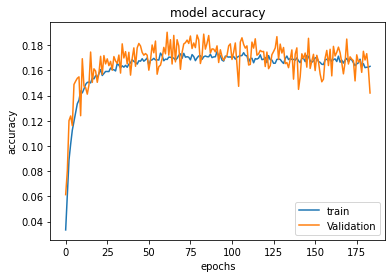

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()